In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

flats=pd.read_excel('book.xlsx')
flats=flats.drop('Rooms',axis=1)
flats=flats.drop(9,axis=0)
flats['Total price']=flats['Pricepermeter']*flats['Sq']
flats.head(16)

,Close,Type,Year,Floor,Refurb,Win,Sq,Balc,Pricepermeter,Total price
0,5,0,1982,2,0,0,30,0,56668,1700040
1,4,0,1970,1,0,1,31,0,62903,1949993
2,4,0,1964,5,1,1,31,1,62300,1931300
3,5,1,1956,2,0,1,38,0,48684,1849992
4,4,1,1975,4,0,1,29,1,57239,1659931
5,3,0,1970,5,1,1,30,0,51667,1550010
6,5,0,1981,5,1,1,31,0,52885,1639435
7,3,0,1964,5,1,1,29,1,58333,1691657
8,4,0,1980,1,1,1,31,0,54098,1677038
10,5,0,1966,5,0,0,31,1,53055,1644705


In [2]:
corr = flats.corr()
corr.style.background_gradient(cmap='coolwarm')

,Close,Type,Year,Floor,Refurb,Win,Sq,Balc,Pricepermeter,Total price
Close,1,-0.301587,0.376316,-0.144536,-0.55301,-0.342962,0.35783,-0.377964,-0.119224,0.18189
Type,-0.301587,1,-0.504605,-0.154504,-0.09759,0.100871,0.3253,0.125988,-0.400187,-0.141037
Year,0.376316,-0.504605,1,-0.040282,-0.0876384,-0.206534,-0.468866,-0.322451,0.158104,-0.239106
Floor,-0.144536,-0.154504,-0.040282,1,0.19407,-0.133026,-0.326854,0.356034,0.0210154,-0.267795
Refurb,-0.55301,-0.09759,-0.0876384,0.19407,1,0.620174,-0.266667,0,0.00606296,-0.214095
Win,-0.342962,0.100871,-0.206534,-0.133026,0.620174,1,0.0826898,-0.160128,0.137026,0.211423
Sq,0.35783,0.3253,-0.468866,-0.326854,-0.266667,0.0826898,1,-0.322749,-0.474577,0.36826
Balc,-0.377964,0.125988,-0.322451,0.356034,0,-0.160128,-0.322749,1,0.183072,-0.0976677
Pricepermeter,-0.119224,-0.400187,0.158104,0.0210154,0.00606296,0.137026,-0.474577,0.183072,1,0.64247
Total price,0.18189,-0.141037,-0.239106,-0.267795,-0.214095,0.211423,0.36826,-0.0976677,0.64247,1


In [3]:
mean_meter=flats['Pricepermeter'].mean()
mean_square=flats['Sq'].mean()
mean_total=flats['Total price'].mean()

print('Mean price per meter is:',mean_meter, 'RUB')
print ('Mean square is:',mean_square, 'm2')
print ('Mean total price is:',mean_total, 'RUB')


Mean price per meter is: 55246.375 RUB
Mean square is: 31.0 m2
Mean total price is: 1709129.9375 RUB


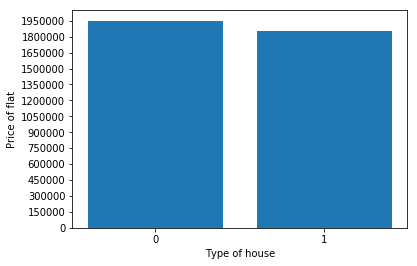

In [4]:
x=flats['Type']
y=flats['Pricepermeter']*flats['Sq']
plt.bar(x,y,align='center')
plt.xlabel('Type of house')
plt.ylabel('Price of flat')
plt.xticks(np.arange(0,2))
plt.yticks(np.arange(0,2100000,150000))
plt.show()

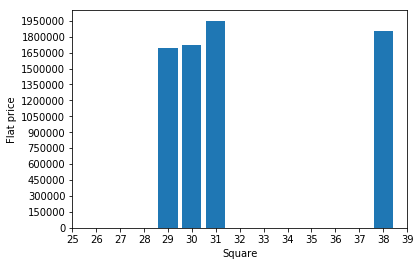

In [5]:
x1=flats['Sq']
y2=flats['Pricepermeter']*flats['Sq']
plt.bar(x1,y2,align='center')
plt.xlabel('Square')
plt.ylabel('Flat price')
plt.xticks(np.arange(25,40,1))
plt.yticks(np.arange(0,2100000,150000))
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold


train=flats[:11]
train=train.drop('Total price',axis=1)
test=flats[11:]
test=test.drop('Total price',axis=1)
features = train.columns.drop(['Pricepermeter','Close','Floor','Refurb'])
lr=linear_model.LinearRegression()
lr.fit(train[features],train['Pricepermeter'])
predictions1=lr.predict(test[features])
predictions2=lr.predict(train[features])
mse_test=mean_squared_error(test['Pricepermeter'],predictions)
mse_train=mean_squared_error(train['Pricepermeter'],predictions2)
rmse_test=np.sqrt(mse_test)
nrmse_test=rmse_test/(flats['Pricepermeter'].mean())
print (rmse_test,nrmse_test,'\n','Predicted total price is',np.mean(predictions)*mean_square,'RUB')


1837.999518180425 0.03326914242211231 
 Predicted total price is 1728197.3194325992 RUB


In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df =df.reindex(shuffled_index)

    last_train_row = int(len(rand_df) / 2)
    
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7]
    k_rmses = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        predicted_labels = knn.predict(test_df[[train_col]])
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse,np.mean(predicted_labels)
    return k_rmses

k_rmse_results = {}
for col in features:
    rmse_val = knn_train_test(col, 'Pricepermeter', flats)
    k_rmse_results[col] = rmse_val

print ('Predicted total price:',mean_square*((55052 + 53992 + 55212)/3))


Predicted total price: 1697312.0


In [52]:
print ('Recommended sales price (including 5% discount for urgency):', 0.95*(1697312+1728197)/2,'RUB')

Recommended sales price (including 5% discount for urgency): 1627116.775 RUB
